### Implementing K-means clustering to detect clusters of alphabet's letters images

In [1]:
from copy import deepcopy
from numpy import linalg as LA

In [2]:

from packages_alphabet_detect.assignment3 import *
from collections import Counter

#alphabets, where each index from 0 to 25, for example alphabet[0]=a,...etc
alphabet=list(map(chr, range(97, 123)))

#clusters
c=26


#get all images, where each image is saved as: [pixels dimensions, alphabet letter index, image name]
# note I save the image name to be able to identify the 
datapoints=get_images(alphabet)

timea=time.time()
alldistances_sorted=getDistancesMatrixSorted(datapoints)
print("time for getting the sorted matrix ",time.time()-timea," sec.")
allindicies=getAllIndicies(datapoints,alphabet)

6  sec.
time for getting the sorted matrix  6.085453033447266  sec.


In [3]:
def isinnearestX(currentpnt,alldistances,currfurthest,c):

    nthnearest=int(len(datapoints)/c)+1
    # get the nearest 182 /26 = 7 neighbors (+1 as the same point is already included compared to itself in the list)
    nearest7pnts=alldistances[currentpnt][:nthnearest]
    
    for i in nearest7pnts:
        #check if the current furthest is not in the nearest 7 points to any of the previously selected c centers
        if currfurthest == i[1]:
            #print (i,currfurthest)
            return True
    #print("return false")
    return False

In [4]:
#eligible means not already chosen, and not even in the nearest 7 (7 is the length of the total array divided by k=26) neighbors to any of the already choosen points, +1 as the same point is already included compared to itself in the list

def eligible(currentpnt,indicies_chosen,alldistances,currfurthest):
    if temp_furthest in indicies_chosen:
        return False
    else:
        for chosenelem in indicies_chosen:
            if isinnearestX(chosenelem,alldistances,currfurthest,c):
                return False
    return True


In [5]:
timeb=time.time()

indicies_choosen2=[]
randindex=random.randint(0,len(datapoints))
#randindex=5
indicies_choosen2.append(randindex)
temp_furthest=alldistances_sorted[randindex][-1][1]
nomeans=False
for f in range(25):
    lastpoint=indicies_choosen2[-1]
    foundafurthest=False
    index=-1
    temp_furthest=alldistances_sorted[lastpoint][index][1]

    while (not foundafurthest) :
        #eligible means not already chosen, and not even in the nearest 7 (7 is the length of the total array divided by k=26) neighbors to any of the already choosen points
        if eligible(lastpoint,indicies_choosen2,alldistances_sorted,temp_furthest):
            foundafurthest=True
            indicies_choosen2.append(temp_furthest)
        else:
            index-=1
            if (index>-182):
                temp_furthest=alldistances_sorted[lastpoint][index][1]
            else:
                print("Couldn't find means satisfying this condition, decrease nearest X")
                nomeans=True
                break
            continue
    
    if nomeans:
        break
if not nomeans:
    print("time 4 initial indicies with less conditions start", time.time()-timeb)    
                




time 4 initial indicies with less conditions start 0.006927490234375


In [6]:
def calc_den(point_index,mean1_idx,Means):
    den=0
    for x in range(len(Means)):
        
        down=(distanceCal(datapoints[point_index][0],Means[x]))**2

        upper=(distanceCal(datapoints[point_index][0],Means[mean1_idx]))**2

        temp_var=(upper/ down)
        #print(temp_var)
        den+=((temp_var)**(1/(q-1)))
    return den

In [7]:
def newrnk_func(Means):
    rnk=[]
    for n in range(len(datapoints)):
        tempk_arr=[]
        for k in range(26):
            rval=1/(calc_den(n,k,Means))
            tempk_arr.append(rval)
        rnk.append(tempk_arr)
    return rnk

In [8]:
def newMeans_func(rnk,training):
    means=[]
    for k in range(26):
        numerator1=((rnk[0][k]**q)*np.matrix(training[0][0]))
        for i in range(1,len(training)):
            numerator1+=((rnk[i][k])**q)*np.matrix(training[i][0])
        denemenator1=rnk[0][k]**q
        for i in range(1,len(training)):
            denemenator1+=(rnk[i][k]**q)
        means.append(list(np.array(numerator1/denemenator1)[0]))
    return means

In [9]:
q=1.25
converged=False
Means=[]
timef=time.time()
for i in indicies_choosen2:
    withnoise=[x + y for x, y in zip(datapoints[i][0], [0.1]*len(datapoints[i][0]))]
    Means.append(withnoise)
#print(np.shape(Means))
count=0
while not converged:
    count+=1
    
    newrnk=newrnk_func(Means)
    #print (np.shape(Means))
    newMeans=newMeans_func(newrnk,datapoints)
    avgdiffmeans=(np.array(newMeans)-np.array(Means)).mean()
    Means=deepcopy(newMeans)
    print (avgdiffmeans)
    if abs(avgdiffmeans)<(1/100000):
        converged=True
#newrnk=newrnk_func(Means)
print ("time for geting rnk, ", (time.time()-timef)/60," mins")
print("in ",count," rounds")

0.424644772097
0.3456452709
0.165468466869
0.0273771204602
-0.013863191905
-0.0108613002164
-0.00562958040031
-0.00299620484711
-0.00164576039425
-0.000780109302175
-0.000382971712067
-0.000197982156517
-0.000101910363413
-5.25330283986e-05
-2.77281346625e-05
-1.42008404152e-05
-7.01651313007e-06
time for geting rnk,  17.18779998222987  mins
in  17  rounds


In [10]:
belongings=[]
for idx,t in enumerate(newrnk):
    largestindex=-1
    largestval=0
    for i,x in enumerate(t):
        if x>largestval:
            largestindex=i
            largestval=x
    
    belongings.append(largestindex+1)
    

In [11]:
belongings_num=[]
for idx,t in enumerate(newrnk):
    largestindex=-1
    largestval=0
    for i,x in enumerate(t):
        if x>largestval:
            largestindex=i
            largestval=x
    
    belongings_num.append([largestindex+1,datapoints[idx][2]])
    

In [12]:
countincluster=[]
for i in range(1,27):
    countincluster.append(belongings.count(i))
    #print("cluster ",i,": ",belongings.count(i)," points in it.")

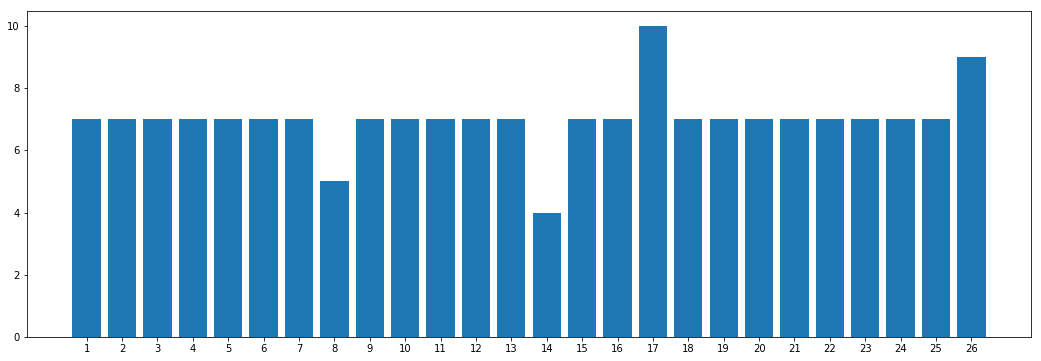

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(18,6))
plt.bar((range(1,27)),countincluster)
plt.xticks(range(1,27),range(1,27))
#plt.savefig('Accuracy.jpg')
plt.show()

In [14]:
sorted_clusters_images=sorted(belongings_num,key=lambda x:x[0])
#sorted_clusters_images

In [15]:
clusters=[]
for i in range(1,27):
    cluster_x_images=[]
    for x in sorted_clusters_images:
        if x[0]==i:
            cluster_x_images.append(x[1])
    print("Cluster ", i," has:", cluster_x_images)
    clusters.append(cluster_x_images)

Cluster  1  has: ['A1l3.jpg', 'A1l7.jpg', 'A1l4.jpg', 'A1l1.jpg', 'A1l6.jpg', 'A1l5.jpg', 'A1l2.jpg']
Cluster  2  has: ['A1j2.jpg', 'A1j4.jpg', 'A1j7.jpg', 'A1j3.jpg', 'A1j5.jpg', 'A1j1.jpg', 'A1j6.jpg']
Cluster  3  has: ['A1r3.jpg', 'A1r6.jpg', 'A1r4.jpg', 'A1r5.jpg', 'A1r1.jpg', 'A1r2.jpg', 'A1r7.jpg']
Cluster  4  has: ['A1d6.jpg', 'A1d4.jpg', 'A1d1.jpg', 'A1d5.jpg', 'A1d7.jpg', 'A1d2.jpg', 'A1d3.jpg']
Cluster  5  has: ['A1t1.jpg', 'A1t7.jpg', 'A1t2.jpg', 'A1t5.jpg', 'A1t4.jpg', 'A1t6.jpg', 'A1t3.jpg']
Cluster  6  has: ['A1o1.jpg', 'A1o6.jpg', 'A1o2.jpg', 'A1o5.jpg', 'A1o3.jpg', 'A1o4.jpg', 'A1o7.jpg']
Cluster  7  has: ['A1i2.jpg', 'A1i4.jpg', 'A1i1.jpg', 'A1i5.jpg', 'A1i6.jpg', 'A1i3.jpg', 'A1i7.jpg']
Cluster  8  has: ['A1u3.jpg', 'A1u2.jpg', 'A1u1.jpg', 'A1u5.jpg', 'A1u4.jpg']
Cluster  9  has: ['A1f3.jpg', 'A1f2.jpg', 'A1f6.jpg', 'A1f1.jpg', 'A1f7.jpg', 'A1f4.jpg', 'A1f5.jpg']
Cluster  10  has: ['A1q7.jpg', 'A1q4.jpg', 'A1q5.jpg', 'A1q2.jpg', 'A1q6.jpg', 'A1q1.jpg', 'A1q3.jpg']
Clu

In [16]:
#problem with u

#problem with h




In [19]:
tempclust=[]
for cluster in clusters:
    temp2=[]
    for letter in cluster:
        temp2.append(letter[2])
    tempclust.append(temp2)

In [20]:
tempclust

[['l', 'l', 'l', 'l', 'l', 'l', 'l'],
 ['j', 'j', 'j', 'j', 'j', 'j', 'j'],
 ['r', 'r', 'r', 'r', 'r', 'r', 'r'],
 ['d', 'd', 'd', 'd', 'd', 'd', 'd'],
 ['t', 't', 't', 't', 't', 't', 't'],
 ['o', 'o', 'o', 'o', 'o', 'o', 'o'],
 ['i', 'i', 'i', 'i', 'i', 'i', 'i'],
 ['u', 'u', 'u', 'u', 'u'],
 ['f', 'f', 'f', 'f', 'f', 'f', 'f'],
 ['q', 'q', 'q', 'q', 'q', 'q', 'q'],
 ['y', 'y', 'y', 'y', 'y', 'y', 'y'],
 ['e', 'e', 'e', 'e', 'e', 'e', 'e'],
 ['x', 'x', 'x', 'x', 'x', 'x', 'x'],
 ['b', 'h', 'h', 'h'],
 ['v', 'v', 'v', 'v', 'v', 'v', 'v'],
 ['m', 'm', 'm', 'm', 'm', 'm', 'm'],
 ['b', 'b', 'b', 'b', 'b', 'b', 'h', 'h', 'h', 'h'],
 ['z', 'z', 'z', 'z', 'z', 'z', 'z'],
 ['p', 'p', 'p', 'p', 'p', 'p', 'p'],
 ['a', 'a', 'a', 'a', 'a', 'a', 'a'],
 ['c', 'c', 'c', 'c', 'c', 'c', 'c'],
 ['s', 's', 's', 's', 's', 's', 's'],
 ['k', 'k', 'k', 'k', 'k', 'k', 'k'],
 ['g', 'g', 'g', 'g', 'g', 'g', 'g'],
 ['w', 'w', 'w', 'w', 'w', 'w', 'w'],
 ['n', 'n', 'n', 'n', 'n', 'n', 'n', 'u', 'u']]

In [21]:
from collections import Counter

for elem in tempclust:
    data = Counter(elem)
    print(data.most_common())

[('l', 7)]
[('j', 7)]
[('r', 7)]
[('d', 7)]
[('t', 7)]
[('o', 7)]
[('i', 7)]
[('u', 5)]
[('f', 7)]
[('q', 7)]
[('y', 7)]
[('e', 7)]
[('x', 7)]
[('h', 3), ('b', 1)]
[('v', 7)]
[('m', 7)]
[('b', 6), ('h', 4)]
[('z', 7)]
[('p', 7)]
[('a', 7)]
[('c', 7)]
[('s', 7)]
[('k', 7)]
[('g', 7)]
[('w', 7)]
[('n', 7), ('u', 2)]


In [22]:
print("All correct except b and h are seen as similar, also 2 letters from u and n ")

All correct except b and h are seen as similar, also 2 letters from u and n 
